https://machinelearningmastery.com/clustering-algorithms-with-python/  

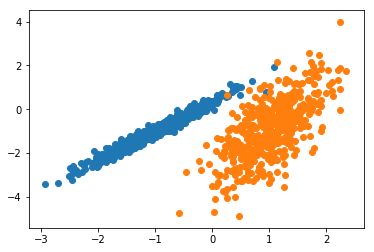

In [2]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

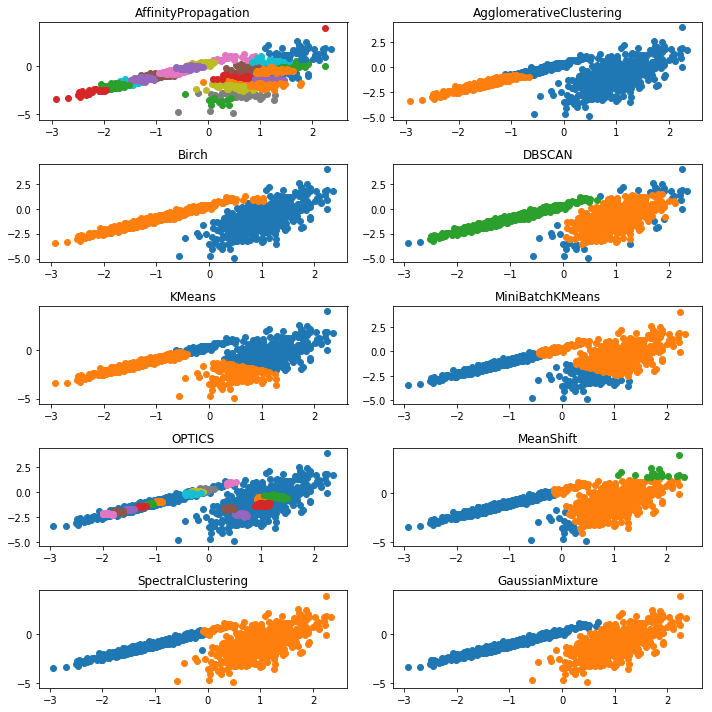

In [21]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, Birch, DBSCAN, KMeans, MiniBatchKMeans, OPTICS, MeanShift, SpectralClustering
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

def cluster(X, mode='KMeans'):
    if mode == 'AffinityPropagation':
        model = AffinityPropagation(damping=0.9)
    elif mode == 'AgglomerativeClustering':
        model = AgglomerativeClustering(n_clusters=2)
    elif mode == 'Birch':
        model = Birch(threshold=0.01, n_clusters=2)
    elif mode == 'DBSCAN':
        model = DBSCAN(eps=0.30, min_samples=9)
    elif mode == 'KMeans':
        model = KMeans(n_clusters=2)
    elif mode == 'MiniBatchKMeans':
        model = MiniBatchKMeans(n_clusters=2)
    elif mode == 'MeanShift':
        model = MeanShift()
    elif mode == 'OPTICS':
        model = OPTICS(eps=0.8, min_samples=10)
    elif mode == 'SpectralClustering':
        model = SpectralClustering(n_clusters=2)
    elif mode == 'GaussianMixture':
        model = GaussianMixture(n_components=2)
    else:
        raise f'{mode}not impleted in here'

    yhat = model.fit_predict(X)

    return yhat

def draw(X, yhat):
    # X is orignal data, yhat is prediction
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for clu in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == clu)
        # create scatter of these samples
        pt.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    plt.show()

def n_clusters(X, models=['AffinityPropagation', 'AgglomerativeClustering', 'Birch', 'DBSCAN','KMeans', 'MiniBatchKMeans', 'OPTICS', 'MeanShift', 'SpectralClustering', 'GaussianMixture']):

    num_models = len(models)
    fig, ax = plt.subplots(5, 2, figsize=(10, 10))
    for i, model in enumerate(models):
        yhat = cluster(X, model)

        clusters = unique(yhat)
        # create scatter plot for samples from each cluster
        for clu in clusters:
            # get row indexes for samples with this cluster
            row_ix = where(yhat == clu)
            # create scatter of these samples
            ax.flat[i].scatter(X[row_ix, 0], X[row_ix, 1])    # flat展平二维图对象为列表
            # ax.flat[i].set(xticks=[], yticks=[])   # 去掉刻度
            # ax.flat[i].text(0.5, 0.5, model, fontsize=18, ha='center')
            ax.flat[i].set_title(model)
        # # show the plot
    plt.tight_layout()    # 控制子图间距
    plt.show()

n_clusters(X)